In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/kaggle/input/fitness-class-attendance-dataset/dataset_3_Fitness Classes Attendance.csv'
data = pd.read_csv(file_path)


In [8]:
print("Dataset overview:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing value in each column:")
print(data.isnull().sum())

print("\nSummary Statistics:")
print(data.describe())

print(data['Product'].unique())
print(data['Region'].unique())
print(data['Customer_Type'].unique())

Dataset overview:
        Date   Product Region Customer_Type  Quantity  Price  Discount  \
0 2024-01-04   Pilates  South        Member        37  70.19      0.22   
1 2024-03-24  CrossFit  North    Non-member         9  30.37      0.05   
2 2024-10-04      Yoga  South    Non-member        26  65.73      0.12   
3 2024-10-20     Zumba  South        Member        23  20.26      0.08   
4 2024-03-05     Zumba   West    Non-member        42  31.81      0.17   

   Revenue  
0  2025.68  
1   259.66  
2  1503.90  
3   428.70  
4  1108.90  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Product        1000 non-null   object        
 2   Region         1000 non-null   object        
 3   Customer_Type  1000 non-null   object        
 4   Quantity       1000 non-null

In [5]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

data = data.drop_duplicates()

data = data.fillna({
    'Quantity': 0,
    'Revenue': 0,
    'Discount': 0.0
})

data = data.dropna(subset=['Date'])

In [6]:
attendance_by_product = data.groupby('Product')['Quantity'].mean()

revenue_by_region = data.groupby('Region')['Revenue'].sum()

attendance_by_month = data.groupby(data['Date'].dt.month)['Quantity'].sum()


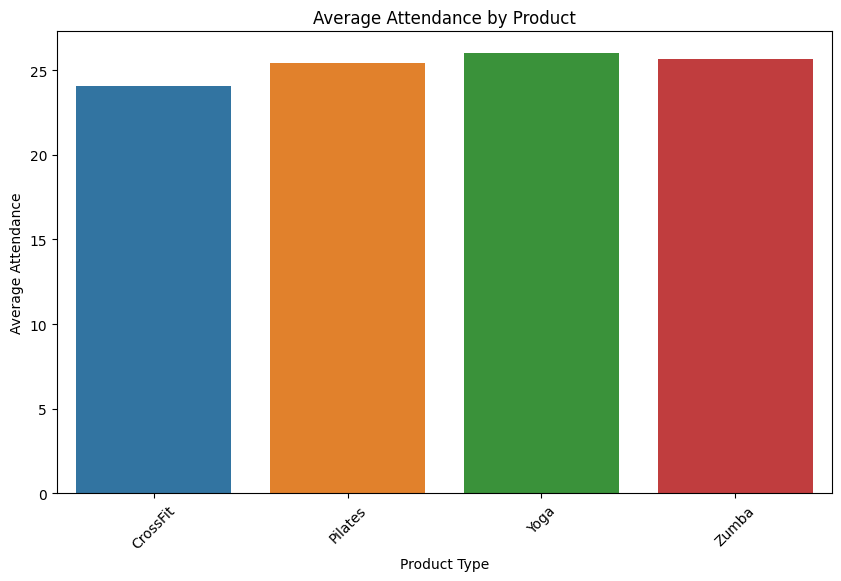

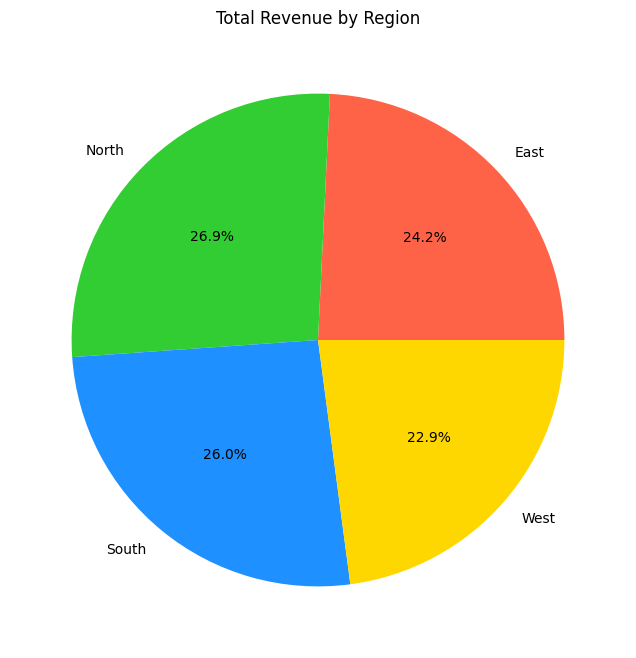

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


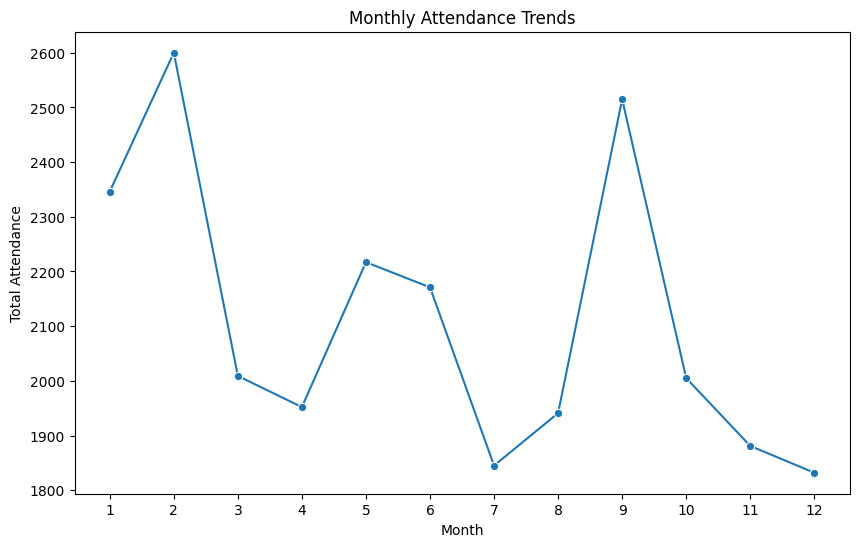

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=attendance_by_product.index, y=attendance_by_product.values)
plt.title("Average Attendance by Product")
plt.ylabel("Average Attendance")
plt.xlabel("Product Type")
plt.xticks(rotation=45)
plt.show()

colors = ['#FF6347', '#32CD32', '#1E90FF', '#FFD700', '#8A2BE2', '#FF4500']

plt.figure(figsize=(8, 8))
plt.pie(revenue_by_region.values, labels=revenue_by_region.index, autopct='%1.1f%%', colors=colors[:len(revenue_by_region)])
plt.title("Total Revenue by Region")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=attendance_by_month.index, y=attendance_by_month.values, marker="o")
plt.title("Monthly Attendance Trends")
plt.ylabel("Total Attendance")
plt.xlabel("Month")
plt.xticks(range(1, 13))
plt.show()

In [ ]:
print("\nConclusions:")
print("1. The average attendance varies significantly between different products.")
print("2. Certain regions generate higher revenue, indicating potentially more engagement.")
print("3. Monthly attendance trends can help identify peak and low activity months.")